In [15]:
from work.segmentation.clarifruit_segmentation.image import Image
import os
import matplotlib.pyplot as plt
import cv2


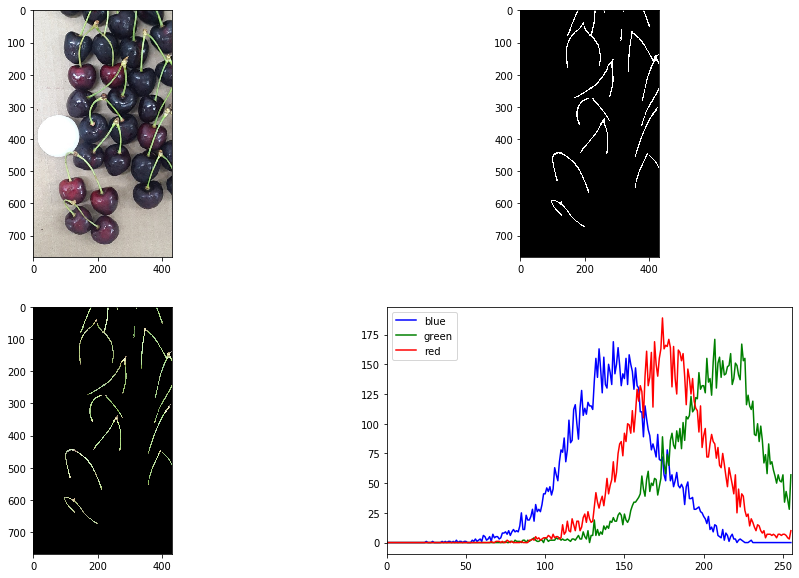

In [2]:

img_path = r'D:\Clarifruit\cherry_stem\data\raw_data\images_orig'
mask_path = r'D:\Clarifruit\cherry_stem\data\unet_data\training\2019-09-22_23-55-20\masks\raw_masks'

orig_img_name='78856-09861.png.jpg'
cur_img_path = os.path.join(img_path, orig_img_name)
cur_mask_path = os.path.join(mask_path, orig_img_name)

threshold = 100

img = Image(cur_img_path,cur_mask_path,threshold)
fig_big_hist,fig_hists=img.get_hist_via_mask(return_hist=True)


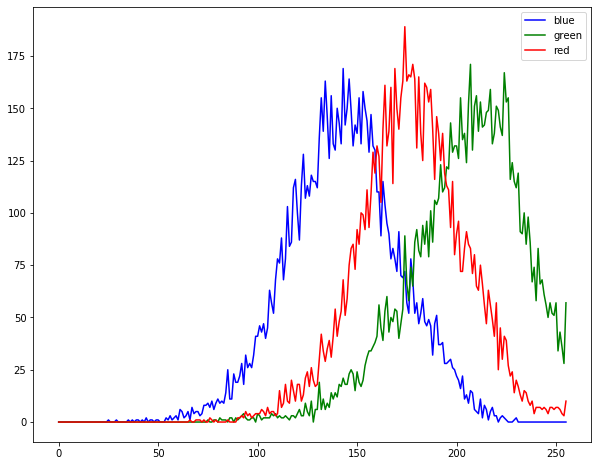

In [3]:
def plot_hist(hist_dict):
    plt.figure(figsize=(10,8))
    for color in hist_dict:
        plt.plot(hist_dict[color],label=color,color=color)
    plt.legend()
    plt.show()
plot_hist(fig_hists)                

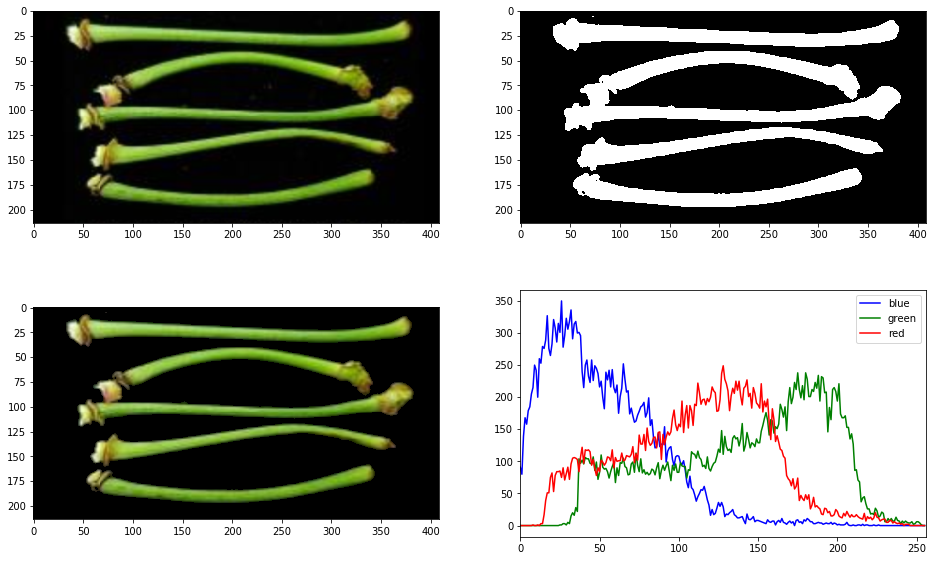

In [4]:
img_path = r'D:\Clarifruit\cherry_stem\data\raw_data\stem classes\image'
mask_path = r'D:\Clarifruit\cherry_stem\data\raw_data\stem classes\label'


img_name="A.PNG"
cur_img_path = os.path.join(img_path, img_name)
cur_mask_path = os.path.join(mask_path, img_name)



img = Image(cur_img_path,cur_mask_path,threshold)
A_big_hist,A_hists=img.get_hist_via_mask(return_hist=True)


B.PNG


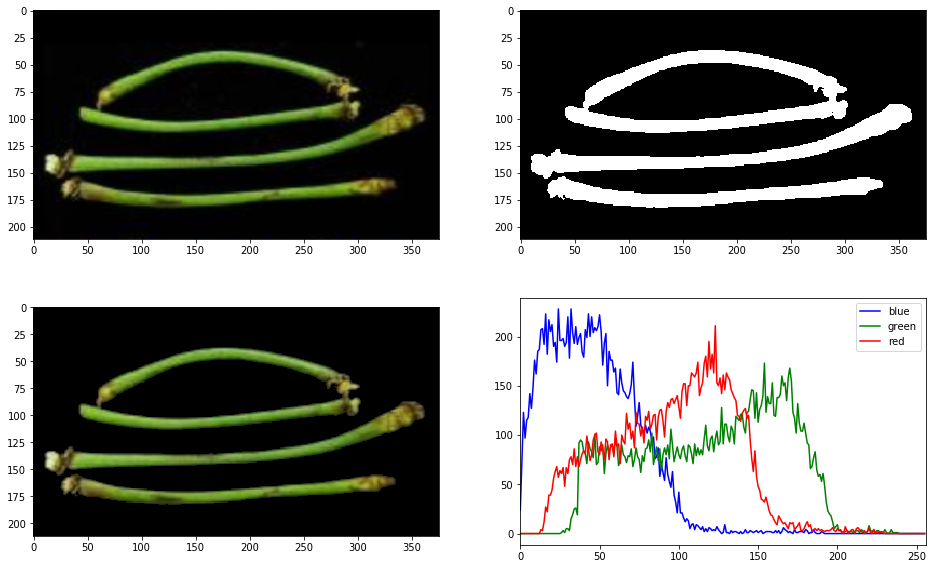

In [5]:
img_name="B.PNG"
cur_img_path = os.path.join(img_path, img_name)
cur_mask_path = os.path.join(mask_path, img_name)



img = Image(cur_img_path,cur_mask_path,threshold)
print(img_name)
B_big_hist,B_hists=img.get_hist_via_mask(return_hist=True)


C.PNG


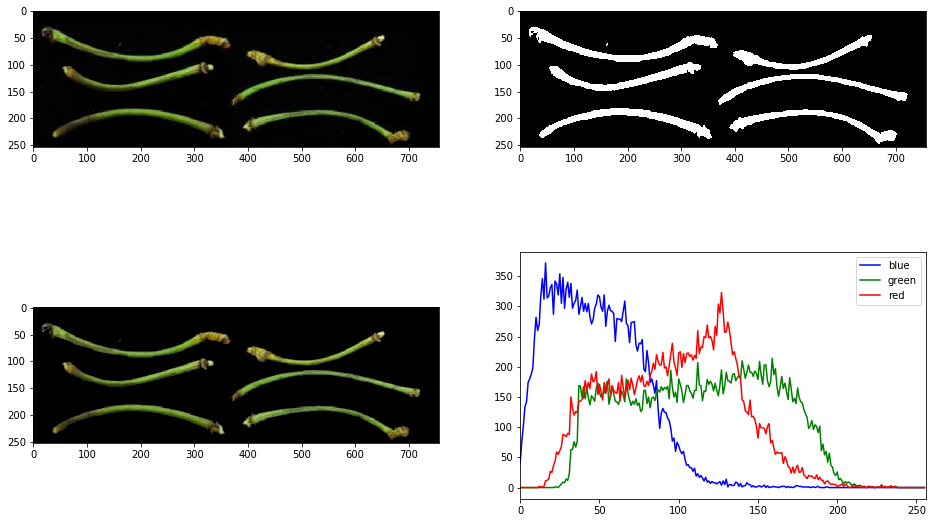

In [6]:


img_name="C.PNG"
cur_img_path = os.path.join(img_path, img_name)
cur_mask_path = os.path.join(mask_path, img_name)



img = Image(cur_img_path,cur_mask_path,threshold)
print(img_name)
C_big_hist,C_hists=img.get_hist_via_mask(return_hist=True)


D.PNG


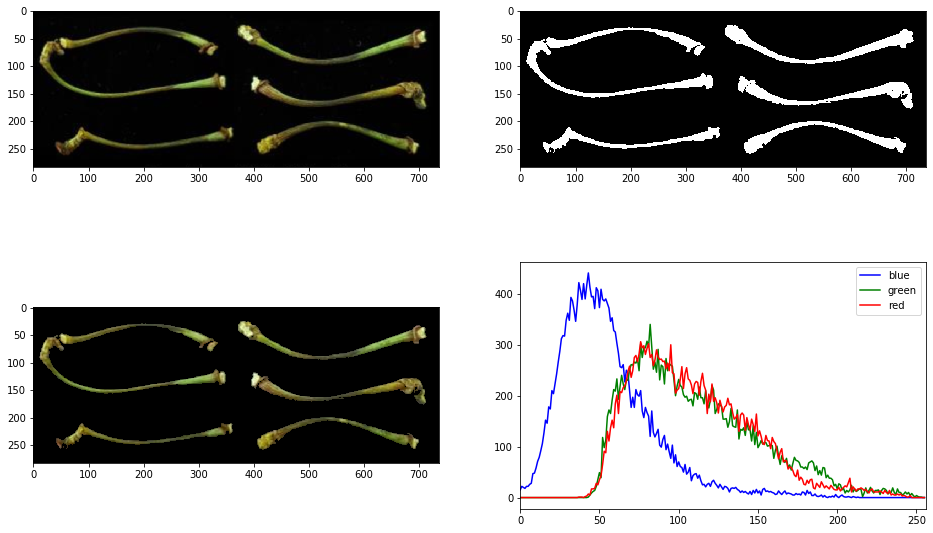

In [7]:


img_name="D.PNG"
cur_img_path = os.path.join(img_path, img_name)
cur_mask_path = os.path.join(mask_path, img_name)



img = Image(cur_img_path,cur_mask_path,threshold)
print(img_name)
D_big_hist,D_hists=img.get_hist_via_mask(return_hist=True)


In [13]:
hists_dict= {orig_img_name : fig_hists,
             'A.PNG' : A_hists,
             'B.PNG' : B_hists,
             'C.PNG' : C_hists,
             'D.PNG' : D_hists}
print(hists_dict.keys())

dict_keys(['78856-09861.png.jpg', 'A.PNG', 'B.PNG', 'C.PNG', 'D.PNG'])


No handles with labels found to put in legend.


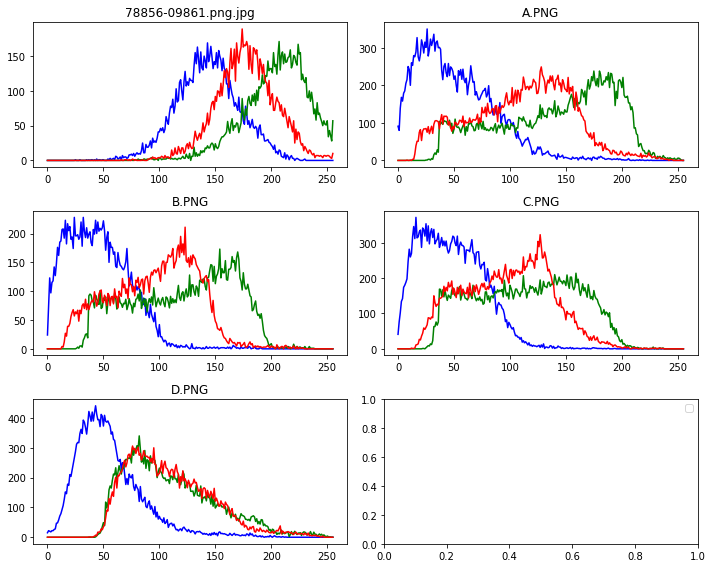

In [11]:
def hist_comapre(input_dict):
    fig,ax=plt.subplots(3,2,figsize=(10,8))
    ax_flat= ax.flatten()
    for i,curr_image_name in enumerate(input_dict.keys()):
        hist_dict=input_dict[curr_image_name]
        curr_ax = ax_flat[i]
        curr_ax.set_title(curr_image_name)
        for color in hist_dict:
            curr_ax.plot(hist_dict[color],label=color,color=color)
                
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    
hist_comapre(hists_dict)            

In [42]:
# METHOD #1: UTILIZING OPENCV
# initialize OpenCV methods for histogram comparison
OPENCV_METHODS = (
    ("Correlation", cv2.HISTCMP_CORREL),
    ("Chi-Squared", cv2.HISTCMP_CHISQR),
    ("Intersection", cv2.HISTCMP_INTERSECT),
    ("Hellinger", cv2.HISTCMP_BHATTACHARYYA))

def compare_hists(classes_dict,src_image_hist):
    final_res = {}
    for method_name, method in OPENCV_METHODS:

        results = {}
        reverse = False

        if method_name in ("Correlation", "Intersection"):
            reverse = True

        for (image_name, hist) in classes_dict.items():

            res = cv2.compareHist(src_image_hist, hist, method)
            results[image_name] = res

        # sort the results
        results = dict(sorted(results.items(),key=lambda item:item[1], reverse = reverse))
        final_res[method_name]=results
    return final_res

In [43]:
classes_dict = {
    
    'A.PNG' : A_big_hist,
    'B.PNG' : B_big_hist,
    'C.PNG' : C_big_hist,
    'D.PNG' : D_big_hist}

In [44]:
res=compare_hists(classes_dict,fig_big_hist)

In [47]:
for method,results in res.items():
    print(method,results)

Correlation {'A.PNG': 0.0026863104232946983, 'D.PNG': 0.001118420257218002, 'C.PNG': 0.00096890305115316, 'B.PNG': 0.0006420011461784453}
Chi-Squared {'A.PNG': 87.80600380121166, 'D.PNG': 87.98535380713818, 'C.PNG': 87.99304191755014, 'B.PNG': 88.07749775448885}
Intersection {'A.PNG': 0.3218163941055536, 'C.PNG': 0.18962697964161634, 'D.PNG': 0.18195985164493322, 'B.PNG': 0.13347989693284035}
Hellinger {'A.PNG': 0.9981037222700143, 'D.PNG': 0.9989436837506375, 'C.PNG': 0.998989712062641, 'B.PNG': 0.9992589226064954}
